 ### Внезапно из API пропало поле 'squadMarketValue'... (см.ниже)
 ### Решил заменить необычным соотношением между количеством букв в названии команды и отношением её побед и поражений

In [47]:
import requests

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.vq import whiten, kmeans2

%matplotlib inline

In [70]:
def call_api(uri, result_key):
    json = {}
    try:
        json = requests.get(uri, headers = { 'X-Auth-Token': 'fc280c29bc44416ca02869f619b3a878' }).json()
        return json[result_key]
    except:
        print(json)
        return None

In [97]:
teams = call_api('http://api.football-data.org/v1/soccerseasons/439/teams', 'teams')
teams

[{'_links': {'fixtures': {'href': 'http://api.football-data.org/v1/teams/496/fixtures'},
   'players': {'href': 'http://api.football-data.org/v1/teams/496/players'},
   'self': {'href': 'http://api.football-data.org/v1/teams/496'}},
  'code': None,
  'crestUrl': 'http://upload.wikimedia.org/wikipedia/de/6/63/Rio_Ave_FC.svg',
  'name': 'FC Rio Ave',
  'shortName': 'Rio Ave'},
 {'_links': {'fixtures': {'href': 'http://api.football-data.org/v1/teams/503/fixtures'},
   'players': {'href': 'http://api.football-data.org/v1/teams/503/players'},
   'self': {'href': 'http://api.football-data.org/v1/teams/503'}},
  'code': 'FCP',
  'crestUrl': 'http://upload.wikimedia.org/wikipedia/de/e/ed/FC_Porto_1922-2005.svg',
  'name': 'FC Porto',
  'shortName': 'Porto'},
 {'_links': {'fixtures': {'href': 'http://api.football-data.org/v1/teams/583/fixtures'},
   'players': {'href': 'http://api.football-data.org/v1/teams/583/players'},
   'self': {'href': 'http://api.football-data.org/v1/teams/583'}},
  'cod

In [98]:
team_for_pd = []
for team in teams:
    len_name = len(team['name'])
    fixtures = call_api(team['_links']['fixtures']['href'], 'fixtures')
    wins = 0
    defeats = 0
    for f in fixtures:
        if f['status'] == 'FINISHED':
            if team['name'] == f['homeTeamName']:
                if f['result']['goalsAwayTeam'] > f['result']['goalsHomeTeam']:
                    defeats = defeats + 1
                elif f['result']['goalsAwayTeam'] < f['result']['goalsHomeTeam']:
                    wins = wins + 1
            else:
                if f['result']['goalsHomeTeam'] > f['result']['goalsAwayTeam']:
                    defeats = defeats + 1
                elif f['result']['goalsAwayTeam'] > f['result']['goalsHomeTeam']:
                    wins = wins + 1

    team_for_pd.append({'name': team['name'], 'len_name': len_name, 'wins/defeats': (wins+1)/(defeats+1)})


In [99]:
teams_pd = pd.DataFrame(team_for_pd)

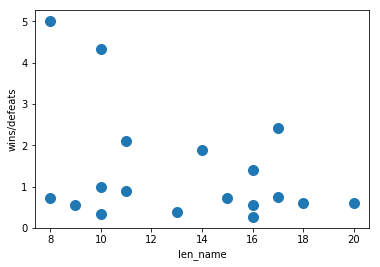

In [102]:
teams_pd.plot.scatter(x='len_name', y='wins/defeats', s=100)

In [103]:
del teams_pd['name']

In [104]:
whitened = whiten(teams_pd.as_matrix())

In [105]:
centroids, cluster_map = kmeans2(whitened, 3)

In [106]:
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]

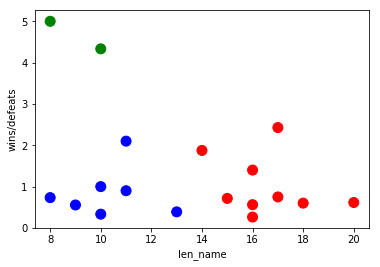

In [108]:
teams_pd.plot.scatter(x='len_name', y='wins/defeats', c=colors, s=100)

In [112]:
centroids, cluster_map = kmeans2(whitened, 5)

In [113]:
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]

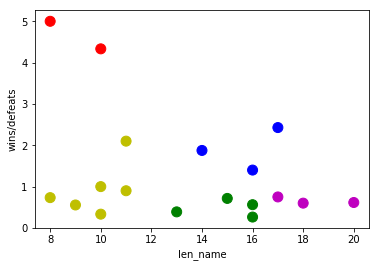

In [114]:
teams_pd.plot.scatter(x='len_name', y='wins/defeats', c=colors, s=100)